<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font",size=14)
plt.rc('axes',labelsize = 14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize =10)
plt.rc('ytick',labelsize=10)

In [ ]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

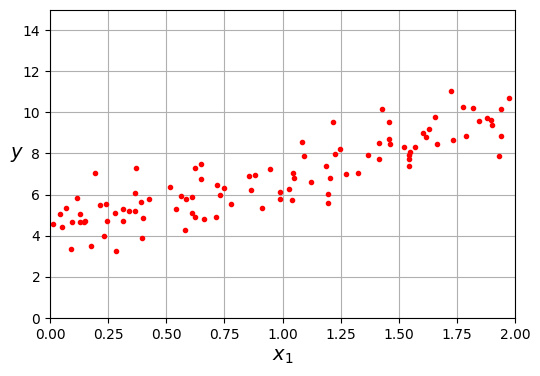

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "r.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [ ]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])

result= matrix_a @ matrix_b
result1 = np.dot(matrix_a,matrix_b)

print("matrix_1")
print(matrix_a)
print('matrix_b')
print(matrix_b)
print('@ istifade etmekle ')
print(result)
print('np.dot dan istifade etmekle')
print(result1)

matrix_1
[[1 2]
 [3 4]]
matrix_b
[[5 6]
 [7 8]]
@ istifade etmekle 
[[19 22]
 [43 50]]
np.dot dan istifade etmekle
[[19 22]
 [43 50]]


In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T@X_b) @ X_b.T @y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

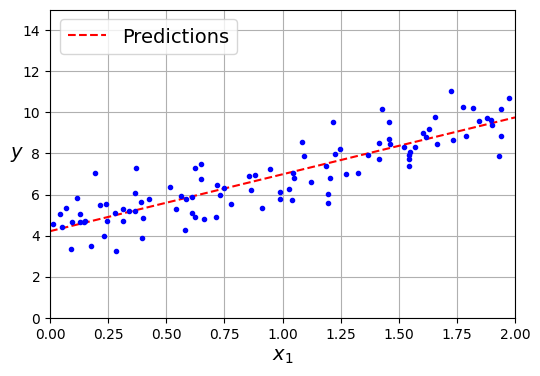

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict, "r--", label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show();

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#Gradient Descent

In [ ]:
eta = 0.1
n_epochs = 1000
X_new_b
m= len(X_b)
np.random.seed(42)
theta =np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 1/m*2*X_b.T @(X_b @ theta - y)
  theta = theta - eta*gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

#Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
eta =0.1
m= len(X_b)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index +1 ]
    yi = y[random_index : random_index + 1]
    gradients = 2*xi.T@(xi@theta-yi)
    theta = theta - eta* gradients
#gradients = 1/m*2*X_b.T @(X_b @ theta - y)
#theta = theta - eta*gradients

In [ ]:
theta

array([[4.17686315],
       [2.85986577]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000,tol=1e-5, penalty=None, eta0= 0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#Mini-batch gradient descent

In [ ]:
from math import ceil
n_epochs = 50
eta = 0.1
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
thetan=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration*minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2/minibatch_size*xi.T@(xi@theta-yi)
    theta = theta - eta*gradients

In [ ]:
theta

array([[4.22034332],
       [2.77035765]])

#Polynomial Regression

In [ ]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X + 2 + np.random.randn(m,1)

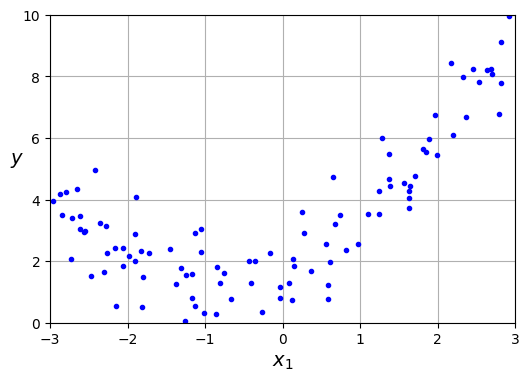

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [ ]:
X_new = np.array([[-3],[3]])
X_preds=lin_reg.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

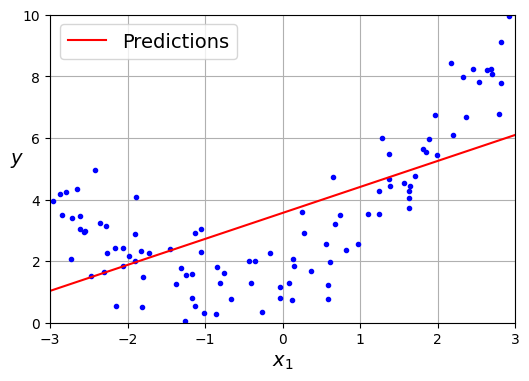

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_new, X_preds, "r-",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
from sklearn.pipeline import make_pipeline
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

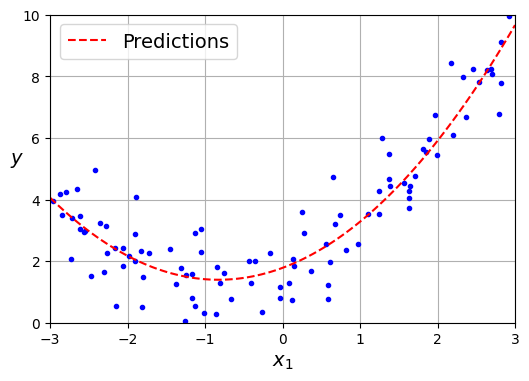

In [ ]:
X_pred = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_pred, y_pred, "r--",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()